---
<h1><center> Analyze II MNIST - Aline Santoso</center></h1>

--- 

## Packages Used:

In [1]:
import pandas as pd
import numpy as np
from itertools import *

import warnings
warnings.filterwarnings('ignore')

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns

# For timing
import timeit

# For modeling
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *

Populating the interactive namespace from numpy and matplotlib


## Introduction

The MNIST data set is a famous example in machine learning. It is a Modified version of the data from the National Institute of Standards and Technology.

The dataset is a collection of labelled handwritten digits from Census Bureau employees and High School Students - the numbers 0-9. When provided with unlabelled digits, the challenge is to determine which digits they were.

It has become something of a challenge to predict the MNIST data using a variety of techniques, and it is routinely used to validate new models and methods.

## Importing and Loading the Dataset

In [2]:
## Info on Data Files:
from scipy import io
from sklearn.model_selection import train_test_split

#this is your downloaded file
data = io.loadmat('mnist-original.mat')

# x here is the pixels where each row refers to each digit, y is the label of each class 
x, y = data['data'].T, data['label'].T

# Split the data into training and testing set 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, 
                                                    stratify = y, shuffle = True, random_state = 123)

## Question 1

Preprocess the data. Visualize one element from each class. Visualize the mean of each class.

Let's take a look at how the dataset looks like first. 

In [3]:
print(x.shape)
print(y.shape)

(70000, 784)
(70000, 1)


It seems that each row corresponds to an image of a number, containing 784 pixels. They have to be re-shaped to 28x28 pixels to form the image. Let's make a dataframe for easy visualization. 

In [4]:
# Make a dataframe of the whole dataset to visualize it first. 
x_df = pd.DataFrame(x)
y_df = pd.DataFrame(y)

# Make one dataframe that combines it the pixel and the label
df = pd.concat([x_df, y_df],axis = 1)

# Rename the columns from 0 to 784
df.columns = range(df.shape[1])

# Rename the last column i.e. 784 to 'label'
df = df.rename(columns={784: 'label'})
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [5]:
# A loop that stores the row location of the first time label is '0', '1' and so-on. 
first_loc = []
label = np.arange(0,10,1)
for i in label:
    first_loc.append(df[df['label']==i].index[0])

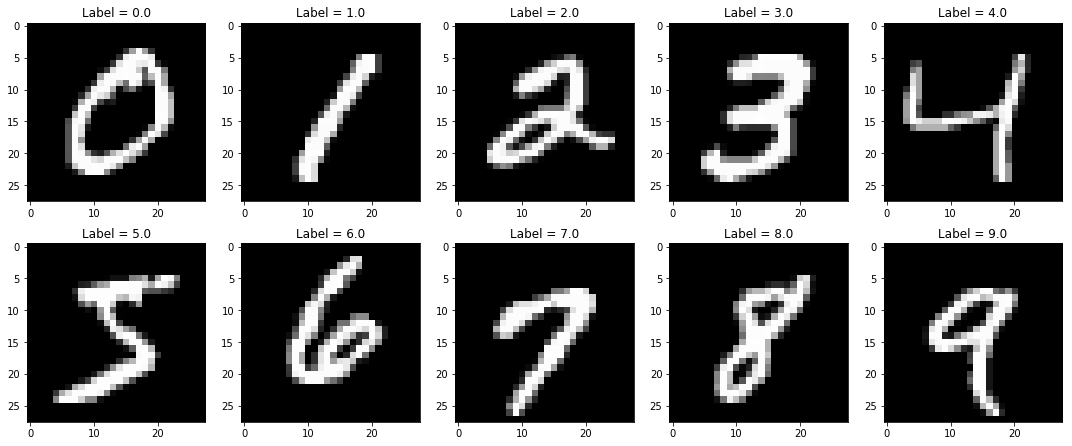

In [6]:
# A loop that subplots one element from each class

f = plt.figure()

for i in range(len(first_loc)):
    # Getting all the datapoints from the 'df' dataframe where the row position is the first location
    # the label changes and the column position is all of the columns except for the 'label' column
    # Reshape this 1-dimensional (784,) dataset to two-dimensional (28,28) dataset
    pixels = df.iloc[first_loc[i],:-1].values.reshape((28,28))
    
    # Plot all these in a subplot
    f.add_subplot(2, 5, i+1)
    plt.imshow(pixels, cmap='gray')
    
    # Make the title the corresponding 'label'
    plt.title(f'Label = {df.iloc[first_loc[i]]["label"]}')
              
    # Set the figure size
    f.set_figheight(15)
    f.set_figwidth(15) 
              
plt.tight_layout()
plt.subplots_adjust(top = 0.4, bottom=0.01, hspace=0.1, wspace=0.2)

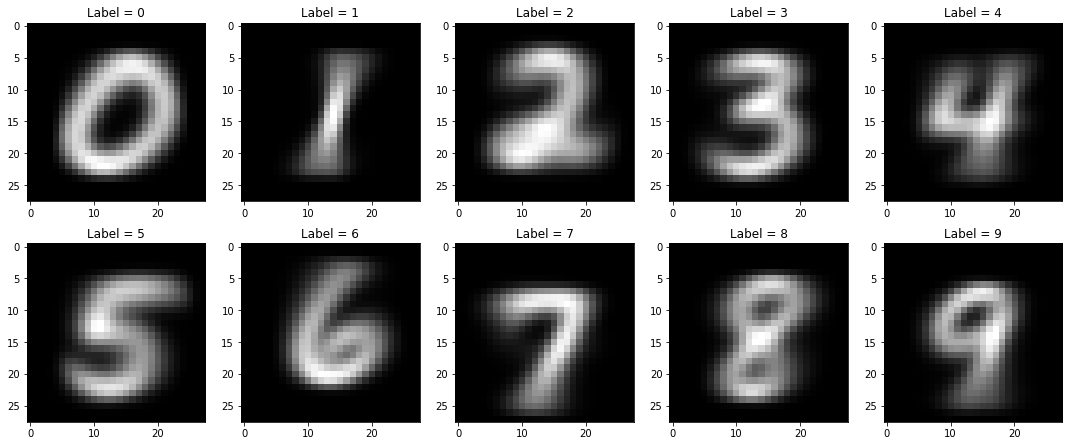

In [7]:
# A loop that subplots the mean element from each class

label = np.arange(0,10,1)
f = plt.figure()

for i in label:
    # Get all the dataset where the column 'label' is equal to the value in the 'label' list. 
    # Take out the last column, which is the 'label' column
    # Get the average of row-wise
    # Reshape this 1-dimensional (784,) dataset to two-dimensional (28,28) dataset
    pixels_avg = df[df['label']==i].iloc[:,:-1].mean().values.reshape(28,28)    
    
    # Plot all these in a subplot
    f.add_subplot(2, 5, i+1)
    plt.imshow(pixels_avg, cmap='gray')
    plt.title(f'Label = {label[i]}')
    f.set_figheight(15)
    f.set_figwidth(15)  
plt.tight_layout()
plt.subplots_adjust(top = 0.4, bottom=0.01, hspace=0.1, wspace=0.2)

## Question 2

Try fitting a logistic regression with its solver set to be the 'lbfgs' algorithm. (If you'd like, you can try the other solvers/optimizers and observe the differences in computation time.)

In [8]:
# Using lbfgs solver and 80% of the full data as the training data. 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

logit = LogisticRegression(solver = 'lbfgs')

# Fit the logistic model to the train data
logit.fit(x_train, y_train.ravel())

# Get the accuracy score
score = logit.score(x_test, y_test)
print(f'Accuracy score: {score}')

/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

Accuracy score: 0.9144285714285715


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [9]:
# Trying different solvers to test the computational time 

# For this purpose, I'm going to just a small subset of my data (10%) to see the differences between each solver
x, y = data['data'].T, data['label'].T

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.1, 
                                                    stratify = y, shuffle = True, random_state = 123)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.5, 
                                                    stratify = y_train, shuffle = True, random_state = 123)

# Trying the different logistic regression solvers
solver_choice = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
run_time_logit = []
accuracy_logit = []

for i in solver_choice:
    start = time.time()
    
    # Fit the logistic model to the train data
    logit = LogisticRegression(solver = i)
    logit.fit(x_train, y_train.ravel())

    end = time.time()

    # Calculate the accuracy and run time
    score = logit.score(x_val, y_val)*100
    accuracy_logit.append(score)
    run_time_logit.append(end-start)
    print(f' Solver: {i}, Accuracy: {score}%, Time: {end-start}s')

/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


 Solver: newton-cg, Accuracy: 82.57142857142857%, Time: 100.10190892219543s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 Solver: lbfgs, Accuracy: 82.82857142857142%, Time: 2.7868621349334717s
 Solver: liblinear, Accuracy: 81.71428571428572%, Time: 12.735061168670654s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-pac

 Solver: sag, Accuracy: 87.85714285714286%, Time: 23.783388137817383s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-pac

 Solver: saga, Accuracy: 88.4%, Time: 25.765589952468872s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


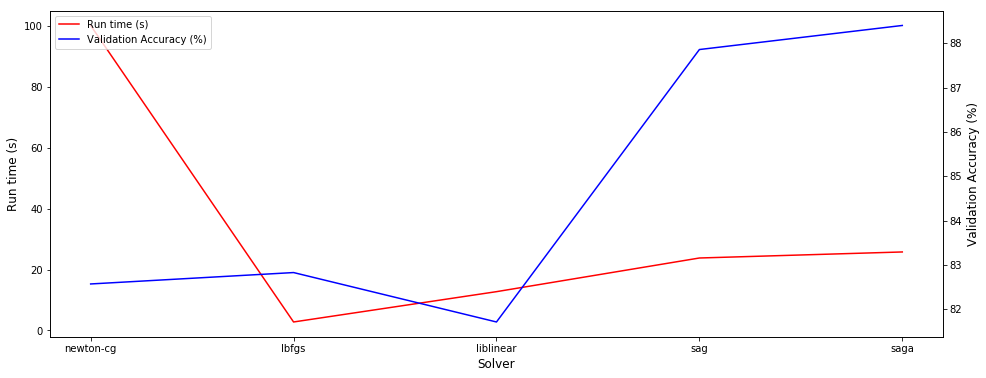

In [108]:
# Plotting the graph for run time and accuracy with the different solvers 
f = plt.figure(1, figsize=(16,6))
ax = f.add_subplot(111)
ln1 = ax.plot(solver_choice, run_time_logit, color = 'red', label = "Run time (s)")
ax.set_ylabel("Run time (s)", size = 12)

ax2 = ax.twinx()
ln2 = ax2.plot(solver_choice, accuracy_logit, color = "blue", label = "Validation Accuracy (%)")
ax2.set_ylabel("Validation Accuracy (%)", size = 12)
ax.set_xlabel("Solver", size = 12)

# To show the legends together
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
plt.show()

For educators: These next two blocks of cells are not meant to answer the question. This is just for fun for myself, to show the misclassified digits in random. 

In [11]:
# Predict the y_values
y_pred = logit.predict(x_test)

index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, y_pred):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

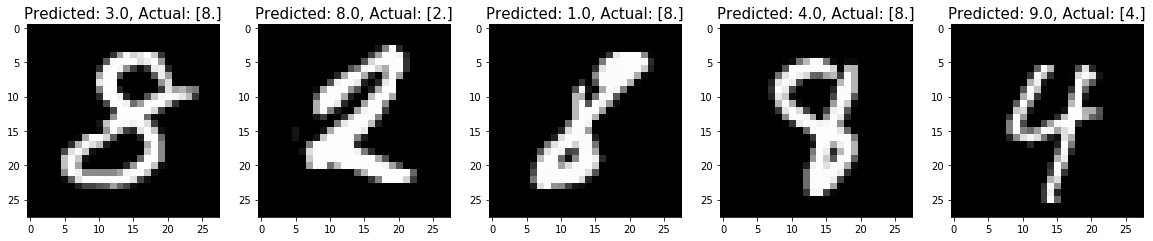

In [12]:
# Showing the 5 in the misclassified indexes
plt.figure(figsize = (20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[badIndex], (28,28)), cmap = "gray")
    plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex], y_test[badIndex]), fontsize = 15)

### 2.1: What does reducing the dimensionality do to the computation time and why?

Theoretically, reducing the dimensionality will reduce the computation time because the number of dimensions are reduced and hence, essentially the number of features in the dataset to be processed is reduced as well. 

In [62]:
# Reducing the dimensionality

x, y = data['data'].T, data['label'].T
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state = 123)

n_components = [1] + list(range(50,784,50))
run_time_dim = []
accuracy_dim = []

for n in n_components:
    start = time.time()
    
    # Build and fit a PCA model to the data
    my_pca = PCA(n_components=n)
    my_pca.fit(x_train)
    
    # Transform the data
    x_train_PCA = my_pca.transform(x_train)
    x_test_PCA = my_pca.transform(x_test)
    
    # Fit the transformed data into a logistic regression model 
    logit = LogisticRegression(solver = 'lbfgs', random_state=123)
    
    # Change the y_train to 1D so that logistic model doesn't complain
    logit.fit(x_train_PCA, y_train.ravel())

    end = time.time()
    
    # Calculate the accuracy and run time
    score = logit.score(x_test_PCA,y_test.ravel())
    accuracy_dim.append(score*100)
    run_time_dim.append(end-start)
    print(f' No. of components: {n}, Accuracy: {round(score*100,2)}%, Time: {round(end-start,2)}s')

 No. of components: 1, Accuracy: 30.36%, Time: 3.87s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


 No. of components: 50, Accuracy: 89.81%, Time: 8.06s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 No. of components: 100, Accuracy: 91.1%, Time: 13.01s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 No. of components: 150, Accuracy: 91.3%, Time: 20.88s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 No. of components: 200, Accuracy: 87.61%, Time: 26.82s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 No. of components: 250, Accuracy: 80.94%, Time: 31.14s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 No. of components: 300, Accuracy: 78.45%, Time: 38.11s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 No. of components: 350, Accuracy: 77.21%, Time: 40.66s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 No. of components: 400, Accuracy: 76.86%, Time: 42.91s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 No. of components: 450, Accuracy: 77.74%, Time: 48.37s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 No. of components: 500, Accuracy: 78.14%, Time: 51.83s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 No. of components: 550, Accuracy: 78.43%, Time: 63.7s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 No. of components: 600, Accuracy: 78.14%, Time: 69.96s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 No. of components: 650, Accuracy: 78.35%, Time: 52.69s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 No. of components: 700, Accuracy: 78.23%, Time: 57.02s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 No. of components: 750, Accuracy: 77.99%, Time: 61.1s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


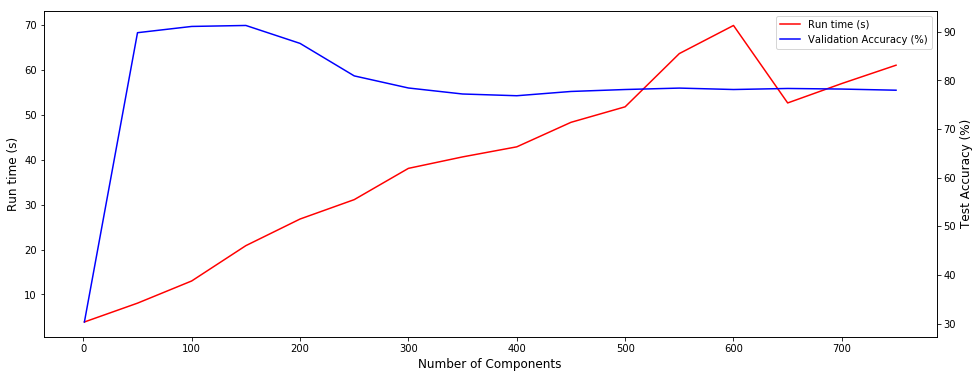

In [109]:
# Plotting the graph for run time and accuracy with the number of components
f = plt.figure(1, figsize=(16,6))
ax = f.add_subplot(111)
ln1 = ax.plot(n_components, run_time_dim, color = 'red', label = "Run time (s)")
ax.set_ylabel("Run time (s)", size = 12)

ax2 = ax.twinx()
ln2 = ax2.plot(n_components, accuracy_dim, color = "blue", label = "Validation Accuracy (%)")
ax2.set_ylabel("Test Accuracy (%)", size = 12)
ax.set_xlabel("Number of Components", size = 12)

# To show the legends together
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
plt.show()


As can be seen from the graph above, reducing the number of components dramatically reduce the computational time (red line). 

### 2.2: What does reducing the number of data points do to the computation time and why?

Reducing the number of data points will also reduce the computation time since again, the amount of dataset to be processed or computed is less. 

In order to reduce the number of data points, I will further split the current training data into two parts, training and validation set. Training the data on the different ratio of training set, I will be able to see the different computational time it will take. 

In [15]:
# Reducing the data points

split_size = np.arange(0.05, 0.8, 0.05)
run_time_pts = []
accuracy_pts = []

for n in split_size:
   # Split the data into training and testing set 
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = n, 
                                                    stratify = y, shuffle = True, random_state = 123)

    # Start the timer
    start = time.time()   
    
    # Fit the transformed data into a logistic regression model 
    logit = LogisticRegression(solver = 'lbfgs', random_state=123)

    # Change the y_train to 1D so that logistic model doesn't complain
    logit.fit(x_train, y_train.ravel())
    
    # End the timer
    end = time.time()
    
    # Calculate the accuracy and run time
    score = logit.score(x_test,y_test)*100
    accuracy_pts.append(score)
    run_time_pts.append(end-start)
    print(f' Datapoints: {n*70000}, Accuracy: {score}%, Time: {end-start}s')

/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 Datapoints: 3500.0, Accuracy: 83.38947368421053%, Time: 3.079130172729492s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 Datapoints: 7000.0, Accuracy: 85.73492063492063%, Time: 6.037095069885254s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 Datapoints: 10500.000000000002, Accuracy: 87.21008403361344%, Time: 7.687753915786743s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 Datapoints: 14000.0, Accuracy: 88.11964285714285%, Time: 11.980915784835815s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 Datapoints: 17500.0, Accuracy: 88.99809523809525%, Time: 14.453952074050903s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 Datapoints: 21000.0, Accuracy: 89.85306122448979%, Time: 16.9164400100708s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 Datapoints: 24500.000000000004, Accuracy: 90.22857142857143%, Time: 20.40754723548889s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 Datapoints: 28000.0, Accuracy: 90.64761904761905%, Time: 23.604315757751465s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 Datapoints: 31500.0, Accuracy: 90.86753246753247%, Time: 25.5837299823761s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 Datapoints: 35000.0, Accuracy: 90.98285714285714%, Time: 28.911579847335815s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 Datapoints: 38500.0, Accuracy: 91.12063492063493%, Time: 31.89218306541443s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 Datapoints: 42000.00000000001, Accuracy: 91.27857142857142%, Time: 34.85864543914795s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 Datapoints: 45500.00000000001, Accuracy: 91.4938775510204%, Time: 38.76980400085449s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 Datapoints: 49000.00000000001, Accuracy: 91.4047619047619%, Time: 40.84200596809387s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

 Datapoints: 52500.00000000001, Accuracy: 91.46857142857144%, Time: 44.61623287200928s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


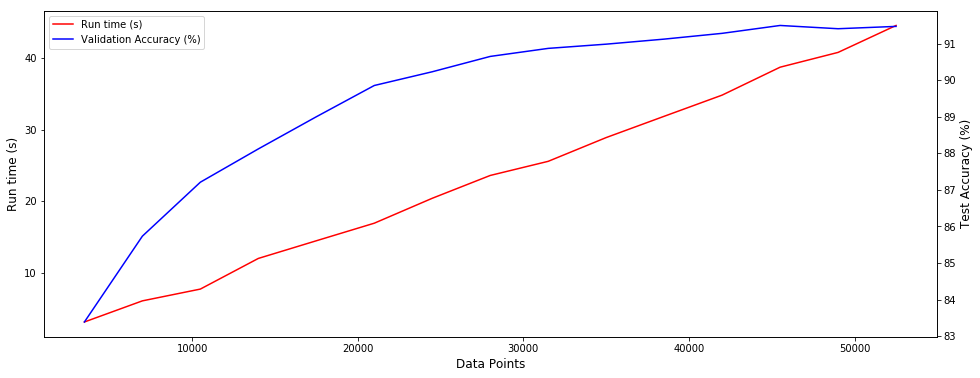

In [110]:
# Plotting the graph for run time and accuracy with the ratio of data points chosen
f = plt.figure(1, figsize=(16,6))
ax = f.add_subplot(111)
ln1 = ax.plot(split_size*70000, run_time_pts, color = 'red', label = "Run time (s)")
ax.set_ylabel("Run time (s)", size = 12)

ax2 = ax.twinx()
ln2 = ax2.plot(split_size*70000, accuracy_pts, color = "blue", label = "Validation Accuracy (%)")
ax2.set_ylabel("Test Accuracy (%)", size = 12)
ax.set_xlabel("Data Points", size = 12)

# To show the legends together
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
plt.show()

As can be seen from the graph above, increasing the number of data points increase the accuracy (blue line) considerably while also increasing the run time (red line) at the same time. The run time varies linearly with the number of data points.

### 2.3: List one advantage and disadvantage of reducing dimensionality. List one advantage and disadvantage of reducing the number of data points.

From question 2.1, one clear advantage of reducing dimensionality is definitely the reduced computational time while still maintaining the accuracy to a certain extent. The accuracy line shows a logistic growth with the number of components, where it rapidly increases and then plateaus, beyond which the increase in accuracy is not considerably large and even drops after the number of components is increased above 150. One disadvantage of reducing dimensionality is its inability to predict new data and since the model is not good anymore, the model loses its interpretability. Since PCA finds a new set of dimensions such that all dimensions are orthogonal and ranked according to the variance of data along them, this new set of dimension loses any interpretability to the features used. 

From question 2.2., one advantage of reducing the data points is the also the reduced computational time to fit the data into the model. Unfortunately, as can be seen from the graph, one disadvantage of reducing the data points is the compromised accuracy. Unlike the case with reducing the number of dimensions, there is no distinct plateau region in reducing the data points i.e. the accuracy will keep on increasing with increasing number of data points.

### Question 3

Use 5-fold cross-validation with a KNN classifier to model the data. Try various values of k )e.g. from 1 to 15) to find the ideal number of neighbors for the model.

#### 3.1. What kind of accuracy are you getting? If you find this is taking too long for your computer you can subset the data to reduce the number of training points.

From question 2.1 and 2.2, it seems like the using PCA from 50 and above with number of data points more than half of the data is sufficient to give 85% accuracy and above. So for question 3, I'm using PCA with 50 number of components and half of the data points to train and validate my data. 

In [91]:
# Subsetting the datapoints by the number of data points and the number of components

# Defining the data points, using only 5% of the data for training
x, y = data['data'].T, data['label'].T

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.5, 
                                                    stratify = y, shuffle = True, random_state = 123)

# Scaling the data 
scalar = preprocessing.StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)

# Defining the number of components to be 50
my_pca = PCA(n_components = 50)
my_pca.fit(x_train)
    
# Transform the data
x_train_PCA = my_pca.transform(x_train)

/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
# Fitting the dataset with k-values from 1 to 15

k_values = range(1,16,1)
knn_small_cross_val_score = []
knn_small_fit_time = []
knn_small_cross_val_time = []

for i in k_values:
    # Fitting the KNN model
    model_start = time.time()   
    KNN_model_small = neighbors.KNeighborsClassifier(n_neighbors=i, random_state=123)
    KNN_model_small.fit(x_train_PCA, y_train.ravel())
    model_end = time.time()
    knn_small_fit_time.append(model_end - model_start)
    
    # Doing the cross-validation
    cross_val_start = time.time()
    val_score = cross_val_score(KNN_model_small, x_train_PCA, y_train.ravel(), cv = 5)*100
    knn_small_cross_val_score.append(mean(val_score))
    cross_val_end = time.time()
    knn_small_cross_val_time.append(cross_val_end - cross_val_start)
    print(f' Number of neighbors: {i}, Cross-validation Accuracy: {round(mean(val_score),2)}%, Time: {round(cross_val_end - cross_val_start,2)}s')


 Number of neighbors: 1, Accuracy: 94.76289574694643%, Time: 82.12374210357666s
 Number of neighbors: 2, Accuracy: 94.14575030927895%, Time: 92.54556798934937s
 Number of neighbors: 3, Accuracy: 95.05432027335272%, Time: 98.0361111164093s
 Number of neighbors: 4, Accuracy: 94.95432678076251%, Time: 102.42221713066101s
 Number of neighbors: 5, Accuracy: 95.00287170104863%, Time: 105.05660104751587s
 Number of neighbors: 6, Accuracy: 95.01718476501891%, Time: 107.64454412460327s
 Number of neighbors: 7, Accuracy: 94.86292309651441%, Time: 109.53447699546814s
 Number of neighbors: 8, Accuracy: 94.82862186186983%, Time: 111.515793800354s
 Number of neighbors: 9, Accuracy: 94.73722429686859%, Time: 113.3595597743988s
 Number of neighbors: 10, Accuracy: 94.72863695149958%, Time: 114.66446304321289s
 Number of neighbors: 11, Accuracy: 94.63149530257907%, Time: 116.25367283821106s
 Number of neighbors: 12, Accuracy: 94.61150019237527%, Time: 117.51892590522766s
 Number of neighbors: 13, Accura

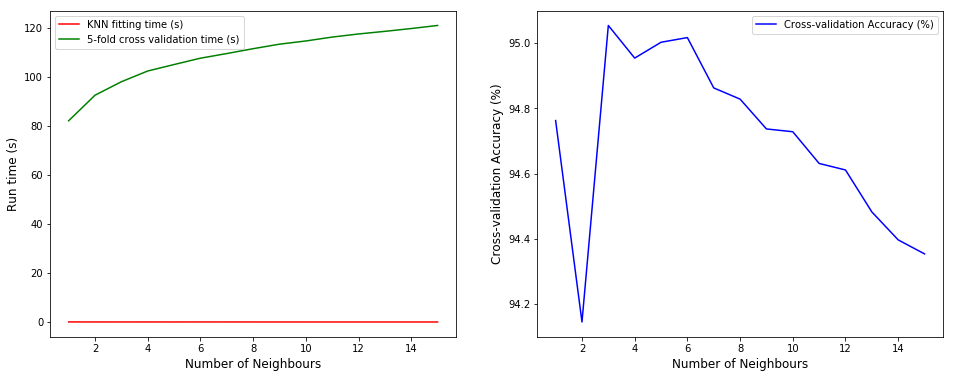

In [103]:
k_values = range(1,16,1)

# Plotting the graph for run time and accuracy with the ratio of data points chosen
f = plt.figure(1, figsize=(16,6))
ax = f.add_subplot(121)
ax.plot(k_values, knn_small_fit_time, color = 'r', label = "KNN fitting time (s)")
ax.plot(k_values, knn_small_cross_val_time, color = 'g', label = "5-fold cross validation time (s)")
ax.set_ylabel("Run time (s)", size = 12)
ax.set_xlabel("Number of Neighbours", size = 12)
plt.legend()

ax2 = f.add_subplot(122)
ax2.plot(k_values, knn_small_cross_val_score, color = "b", label = "Cross-validation Accuracy (%)")
ax2.set_ylabel("Cross-validation Accuracy (%)", size = 12)
ax2.set_xlabel("Number of Neighbours", size = 12)
plt.legend()
plt.show()

As you can see from the two graphs above, the best cross-validation accuracy (95.05%) is when number of neighbors is 3. 

Also, we can see that fitting the data doesn't take a significant amount of time. Cross-validation is the cause of high computational time. This is because the training phase of the algorithm consists only of storing the feature vectors and class labels of the training samples. In the validation/testing phase, the new datapoint is classified by assigning the label which are most frequent among the k training samples nearest to that query point – hence higher computation.



#### 3.2. What happens to train and validation set accuracy if you set the K in your K-NN model to 1 (1-Nearest Neighbours) or to the number of training points (60000-Nearest Neighbours).

Due to time constraint, I will test it on the maximum number of training points = 25000. 

In [24]:
# Fitting the dataset with k-values from 1, 5000, 10000, 20000 and 25000

k_values = [1, 5000, 10000, 20000, 25000]
knn_cross_val_score = []
knn_fit_time = []
knn_cross_val_time = []

for i in k_values:
    # Fitting the KNN model
    model_start = time.time()   
    KNN_model = neighbors.KNeighborsClassifier(n_neighbors=i, n_jobs = -1)
    KNN_model.fit(x_train_PCA, y_train.ravel())
    model_end = time.time()
    knn_fit_time.append(model_end - model_start)

    # Doing the cross-validation
    cross_val_start = time.time()
    val_score = cross_val_score(KNN_model, x_train_PCA, y_train.ravel(), cv = 5)*100
    knn_cross_val_score.append(mean(val_score))
    cross_val_end = time.time()
    knn_cross_val_time.append(cross_val_end - cross_val_start)
    print(f' Number of neighbors: {i}, Cross-validation Accuracy: {round(mean(val_score),2)}%, Computational Time: {round(cross_val_end - cross_val_start,2)}s')
                                                  

1
 Number of neighbors: 1, Accuracy: 95.44999121295486%, Time: 88.49772596359253s
5000
 Number of neighbors: 5000, Accuracy: 71.1553475310063%, Time: 406.6826481819153s
10000
 Number of neighbors: 10000, Accuracy: 56.32854479356524%, Time: 544.9008519649506s
20000
 Number of neighbors: 20000, Accuracy: 30.360731011064285%, Time: 1180.3864789009094s
25000
 Number of neighbors: 25000, Accuracy: 21.478566933992447%, Time: 1085.5057921409607s


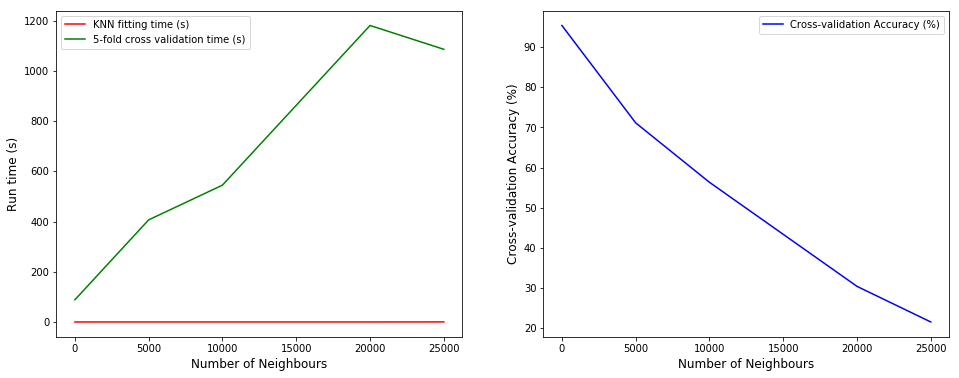

In [102]:
k_values = [1, 5000, 10000, 20000, 25000]

# Plotting the graph for run time and accuracy with the number of neighbours chosen
f = plt.figure(1, figsize=(16,6))
ax = f.add_subplot(121)
ax.plot(k_values, knn_fit_time, color = 'r', label = "KNN fitting time (s)")
ax.plot(k_values, knn_cross_val_time, color = 'g', label = "5-fold cross validation time (s)")
ax.set_ylabel("Run time (s)", size = 12)
ax.set_xlabel("Number of Neighbours", size = 12)
plt.legend()

ax2 = f.add_subplot(122)
ax2.plot(k_values, knn_cross_val_score, color = "b", label = "Cross-validation Accuracy (%)")
ax2.set_ylabel("Cross-validation Accuracy (%)", size = 12)
ax2.set_xlabel("Number of Neighbours", size = 12)
plt.legend()
plt.show()

#### 3.3. Can you explain what is going on and why it is happening?

From the graph above, increasing the number of neighbors from 1 to 25,000 dramatically reduce the cross-validation accuracy of the model. Cross-validation accuracy accounts both the training accuracy and the validation accuracy of the model. When k = 1, the bias is 0, which means that the training accuracy is 100%. However, when we cross-validate the model, since k = 1, the variance might be high and the hence, the cross-validation accuracy is not 100% and only 90% and above. 

When k is very high, for example 5000 and above, the bias of the model increases and the training accuracy decreases. Since the model is very biased, the model loses its interpretability on new data and hence, the cross-validation accuracy decreases tremendously. 

#### 3.4. Answer the previous question again but using decision trees where instead of controlling for K we control for the depth of the tree.

In [111]:
# Using decision tree

depth_number = [1] + list(range(5,55,5))
DT_time = []
DT_cross_val_accuracy = []

for depth in depth_number:
    start = time.time()
    # Fitting the model into decision treee
    DT_model = tree.DecisionTreeClassifier(max_depth = depth, random_state=123)
    DT_model.fit(x_train_PCA, y_train)

    # Cross-validating 
    val_score = cross_val_score(DT_model, x_train_PCA, y_train.ravel(), cv = 5)*100
    DT_cross_val_accuracy.append(mean(val_score))
    end = time.time()
    DT_time.append(end-start)
    print(f' Depth: {depth}, Cross-validation Accuracy: {round(mean(val_score),2)}%, Computational time: {round(end-start,2)}s')

 Depth: 1, Cross-validation Accuracy: 19.37%, Computational time: 1.55s
 Depth: 5, Cross-validation Accuracy: 55.75%, Computational time: 7.07s
 Depth: 10, Cross-validation Accuracy: 78.87%, Computational time: 12.0s
 Depth: 15, Cross-validation Accuracy: 82.14%, Computational time: 15.63s
 Depth: 20, Cross-validation Accuracy: 81.87%, Computational time: 19.97s
 Depth: 25, Cross-validation Accuracy: 81.85%, Computational time: 21.28s
 Depth: 30, Cross-validation Accuracy: 81.78%, Computational time: 21.03s
 Depth: 35, Cross-validation Accuracy: 81.59%, Computational time: 21.34s
 Depth: 40, Cross-validation Accuracy: 81.77%, Computational time: 21.38s
 Depth: 45, Cross-validation Accuracy: 81.77%, Computational time: 20.9s
 Depth: 50, Cross-validation Accuracy: 81.77%, Computational time: 21.16s


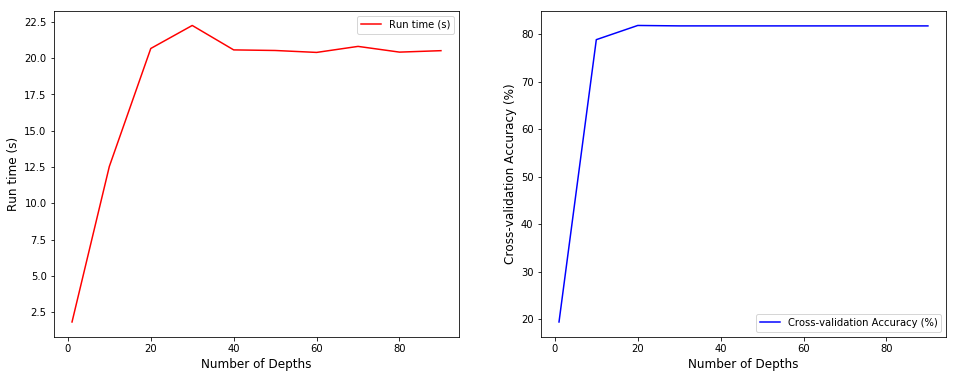

In [100]:
# Plotting the graph for run time and accuracy with the number of depth chosen
f = plt.figure(1, figsize=(16,6))
ax = f.add_subplot(121)
ax.plot(depth_number, DT_time, color = 'r', label = "Run time (s)")
ax.set_ylabel("Run time (s)", size = 12)
ax.set_xlabel("Number of Depths", size = 12)
plt.legend()

ax2 = f.add_subplot(122)
ax2.plot(depth_number, DT_cross_val_accuracy, color = "b", label = "Cross-validation Accuracy (%)")
ax2.set_ylabel("Cross-validation Accuracy (%)", size = 12)
ax2.set_xlabel("Number of Depths", size = 12)
plt.legend()
plt.show()

From the graph above, the cross-validation accuracy plateaus at 81.77% after number of depths is greater than 30. When depth = 1, the cross-validation score is very low since it's a very simple model (there are only 2 possible classes out of the 10 classes that we have). A complicated decision tree, one that is very deep, has a low bias and high variance since it has more decision nodes to go through. In such a case, the training accuracy will be 100% but when we introduce a new datapoint to it, if the parameter is slightly different, the datapoint might be classified to a different class resulting in a decreased validation accuracy. Hence, with this bias-variance trade-off in mind, the cross-validation accuracy reaches a plateau once the tree has a certain depth, as seen in the graph. 

In both of these models, similar to all machine learning models, there is always a bias-variance trade-off. The trade-off can actually be illustrated more clearly if we use a separate training score and validation score instead of using the cross-validation score. But since the question asks for cross-validation score, I only display that here. 

### Question 4

#### 4.1. Fit a linear model, such as logistic regression or an SVM (to speed up training you can modify the default settings). Try to get as high an accuracy as possible on a validation set.

In [87]:
# Logistic Regression

# Defining the data points used
x, y = data['data'].T, data['label'].T

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, 
                                                    stratify = y, shuffle = True, random_state = 123)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = 0.8, 
                                                    stratify = y_train, shuffle = True, random_state = 123)


# Defining the number of components to be 100
my_pca = PCA(n_components = 100)
my_pca.fit(x_train)

# Transform the data
x_train = my_pca.transform(x_train)
x_val = my_pca.transform(x_val)

logit_time = []
logit_val_score = []

c_values = [1e-12,1e-11,1e-10,1e-9,1e-8,1e-6,1e-4,1e-2,1]

for i in c_values: 
    start = timeit.default_timer()
    
    # Fitting the logistic model
    logit = LogisticRegression(C = i, solver = 'lbfgs')
    logit.fit(x_train, y_train.ravel())
    
    # Calculating accuracy
    score = logit.score(x_val, y_val)*100
    logit_val_score.append(score)
    
    end = timeit.default_timer()
    logit_time.append(end-start)
    print(f'C-values: {i}, Validation accuracy: {round(score,2)}%, Time: {round(end-start,2)}s')

C-values: 1e-12, Validation accuracy: 11.25%, Time: 2.32s
C-values: 1e-11, Validation accuracy: 11.99%, Time: 2.04s
C-values: 1e-10, Validation accuracy: 64.46%, Time: 2.2s
C-values: 1e-09, Validation accuracy: 81.01%, Time: 2.22s
C-values: 1e-08, Validation accuracy: 86.77%, Time: 3.42s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

C-values: 1e-06, Validation accuracy: 90.52%, Time: 8.38s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

C-values: 0.0001, Validation accuracy: 90.77%, Time: 8.04s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

C-values: 0.01, Validation accuracy: 90.77%, Time: 8.07s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

C-values: 1, Validation accuracy: 90.81%, Time: 8.15s


/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


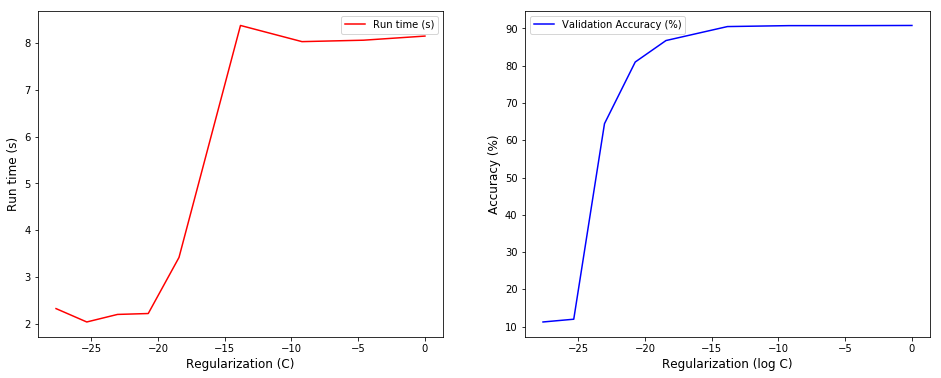

In [114]:
# Plotting the graph for run time and accuracy with the C chosen
f = plt.figure(1, figsize=(16,6))
ax = f.add_subplot(121)
log_c = log(c_values)
ax.plot(log_c, logit_time, color = 'r', label = "Run time (s)")
ax.set_ylabel("Run time (s)", size = 12)
ax.set_xlabel("Regularization (C)", size = 12)
plt.legend()

ax2 = f.add_subplot(122)
ax2.plot(log_c, logit_val_score, color = "b", label = "Validation Accuracy (%)")
ax2.set_ylabel("Accuracy (%)", size = 12)
ax2.set_xlabel("Regularization (log C)", size = 12)
plt.legend()
plt.show()

#### 4.2. What does the class confusion matrix look like for your best model? Is there anything that stands out in it?

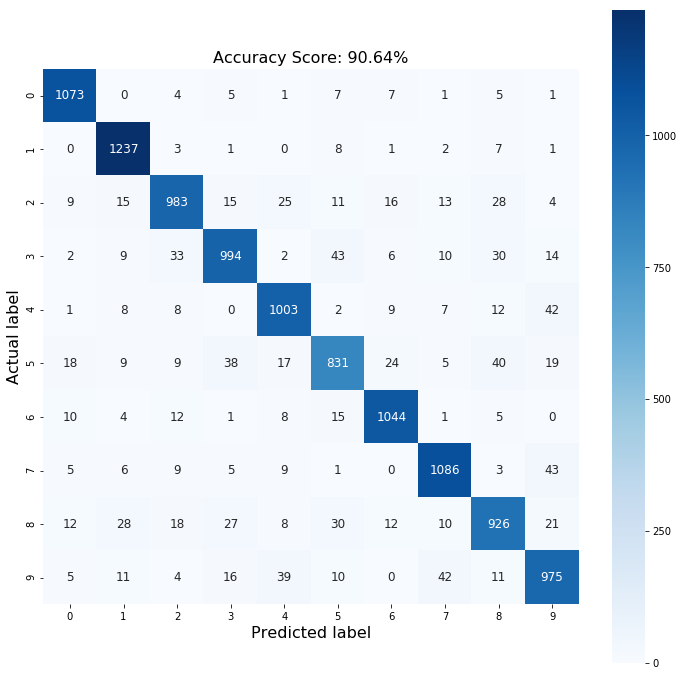

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

y_pred = logit.predict(x_val)
plt.figure(figsize=(12,12))
cm = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot = True, square = True, fmt=".0f", annot_kws={"size": 12}, cmap = "Blues")
plt.ylabel('Actual label', size = 16)
plt.xlabel('Predicted label', size = 16)
title = 'Accuracy Score: {0}%'.format(round(logit.score(x_val,y_val)*100,2))
plt.title(title, size = 16)
plt.show()

For the best model I get from logistic regression, the class confusion matrix is actually pretty good. The diagonal is the highest number there is, which means that the predicted label does match with the actual label. Let's now fill in the diagonals with 0 so that we can the patterns of misclassified labels. Since the diagonals are all greater than 800, let's replace those with 0. 

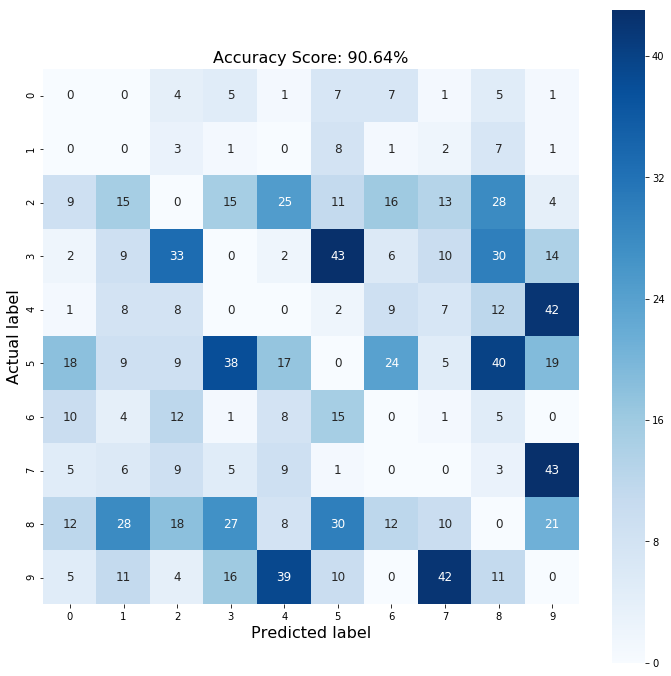

In [31]:
# Replacing the diagonals with 0 so that we can see the pattern more clearly
cm = metrics.confusion_matrix(y_val, y_pred)
cm_normalized = np.where(cm > 800,0,cm)

plt.figure(figsize=(12,12))
sns.heatmap(cm_normalized, annot = True, square = True, fmt=".0f", annot_kws={"size": 12}, cmap = "Blues")
plt.ylabel('Actual label', size = 16)
plt.xlabel('Predicted label', size = 16)
title = 'Accuracy Score: {0}%'.format(round(logit.score(x_val,y_val)*100,2))
plt.title(title, size = 16)
plt.show()

From the "normalized" confusion table, we can now clearly see which numbers are often misclassified. Let's focus on numbers that have been misclassified more than 30x. Number 3 is often mistaken for 2 (35 times) and 5 (46 times). Number 4 is often mistaken for 4 (42 times). Number 5 is mistaken for 4 (35 times) and 8 (41 times). Number 7 is mistaken for 9 (42 times). Number 8 is mistaken for 5 (32 times). Number 9 is often mistaken for 4 (37 times) and 7 (44 times). 

#### 4.3. Re-fit a linear model that can discriminate between the digit 4 and the digit 9. Visualize the weights of the model as an image, does anything stand out?

First of all, let's visualize the weights of all the coefficients corresponding to each class. This means, we would need a (10 x 784) pixel matrix, where the 10 corresponds to the total number of classes and 784 corresponds to the individual pixel belonging to that matrix. 

If we perform PCA on this, we can get this matrix by doing a vector multiplication on the logistic coefficients (10 classes x number of PCA-transformed coefficients matrix) and the PCA components (number of PCA components matrix x 784 pixels). Visualizing the weights shows us how logistic regression classifies the data. 

Let's also apply different regularization value to show the corresponding coefficient weights. From question 4.2, we can focus on c_values = 1e-10, 1e-9, 1e-8 and 1 since they give us different range of accuracy. 

C-values: 1e-10, Accuracy: 64.45%


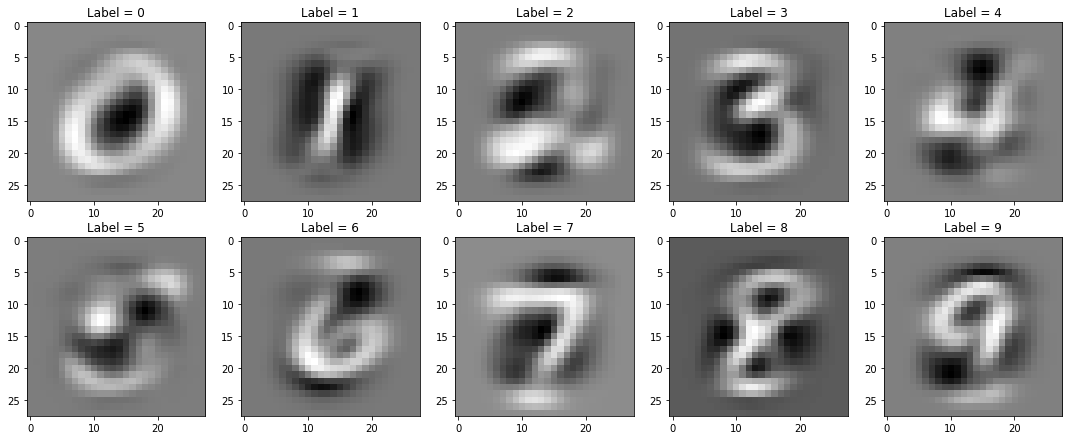

C-values: 1e-09, Accuracy: 81.02%


<Figure size 432x288 with 0 Axes>

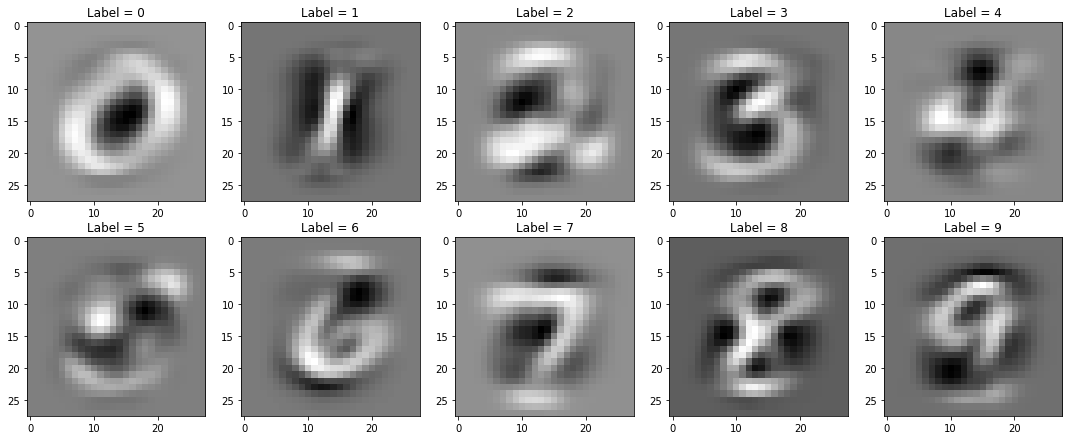

C-values: 1e-08, Accuracy: 86.69%


<Figure size 432x288 with 0 Axes>

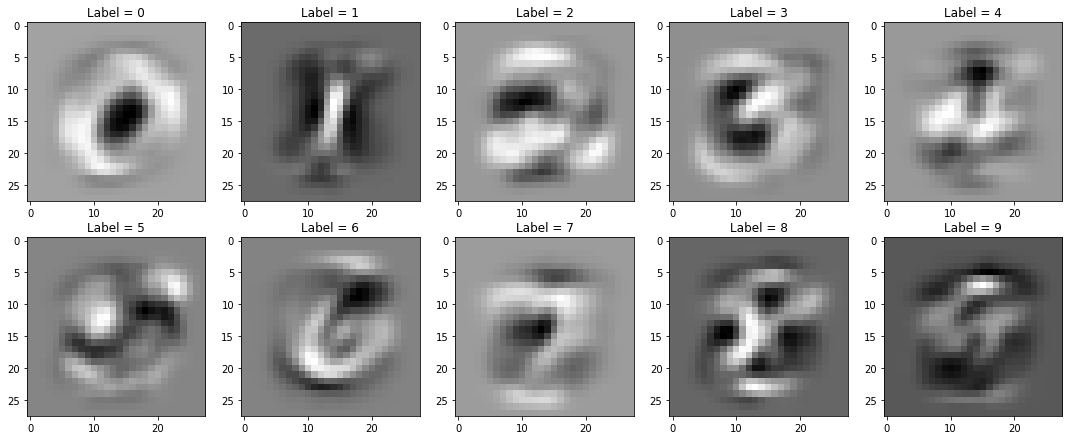

/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:7

C-values: 1, Accuracy: 90.81%


<Figure size 432x288 with 0 Axes>

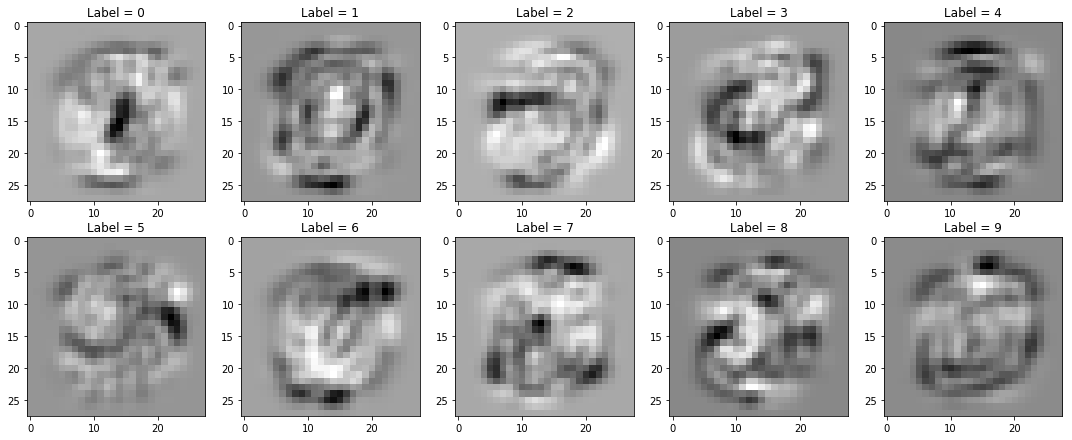

<Figure size 432x288 with 0 Axes>

In [33]:
# Visualizing the coefficients for each pixel 
x, y = data['data'].T, data['label'].T

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, 
                                                    stratify = y, shuffle = True, random_state = 123)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = 0.8, 
                                                    stratify = y_train, shuffle = True, random_state = 123)

# Defining the number of components to be 100
my_pca = PCA(n_components = 100)
my_pca.fit(x_train)

# Transform the data
x_train = my_pca.transform(x_train)
x_val = my_pca.transform(x_val)

logit_val_score = []

c_values = [1e-10,1e-9,1e-8,1]

for i in c_values:     
    # Fitting the logistic model
    logit = LogisticRegression(C = i, solver = 'lbfgs')
    logit.fit(x_train, y_train.ravel())
    
    # Calculating accuracy
    score = logit.score(x_val, y_val)*100
    logit_val_score.append(score)
    
    print(f'C-values: {i}, Accuracy: {round(score,2)}%')
    
    # Vector multiplication to get 10 x 784 mat
    pixels = logit.coef_.dot(my_pca.components_)
    
    # Let's plot the coefficients of the ten classes
    f = plt.figure()
    for j in range(pixels.shape[0]):
        f.add_subplot(2, 5, j+1)
        plt.imshow(pixels[j].reshape(28,28),cmap = "gray")
        plt.title(f'Label = {j}')
        f.set_figheight(15)
        f.set_figwidth(15)  
        plt.tight_layout()
        plt.subplots_adjust(top = 0.4, bottom=0.02, hspace=0.1, wspace=0.2)
    plt.show()
    plt.tight_layout()

The coefficient weights represent the size and direction of the relationship between a predictor and the response variable. In logistic regression, a change in the predictor variable decides whether an event is more or less likely to happen. From the images above, we can see that when the accuracy is low, the coefficient weights look very distinctly like the label number. This is expected, since this means that to be classified as that particular number, each pixel data needs to look as close to the true number (as visualized by the coefficient weights). This results in the model being able to predict the ones who look more like the number but not the ones which are the number but are slightly 'off' in the handwritten, hence reducing the accuracy. Increasing the accuracy makes the coefficient weights visualization more blurry, allowing the number that is badly handwritten to be classified correctly. The better model, in a way, allows for more 'variance' in the handwritten digits. 

Now, let's investigate only label 4 and 9. 

In [148]:
# Fishing out only label 4 and 9
df_4 = df[df["label"]==4.0]
df_9 = df[df["label"]==9.0]

# Making a new dataframe with only 4 and 9
df_small = pd.concat([df_4,df_9]).reset_index(drop = True)

df_small.label[df_small.label == 0.0] = 0
df_small.label[df_small.label == 1.0] = 1

# Defining the new x and the new y 
x = df_small.iloc[:,:-1]
y = df_small.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, 
                                                    stratify = y, shuffle = True, random_state = 123)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = 0.8, 
                                                    stratify = y_train, shuffle = True, random_state = 123)

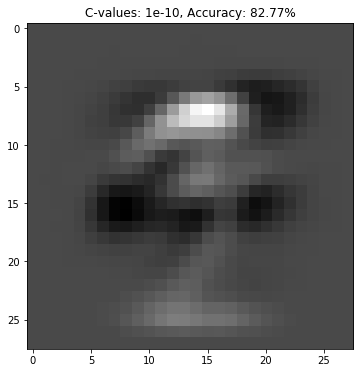

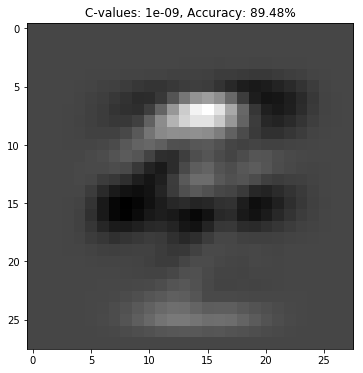

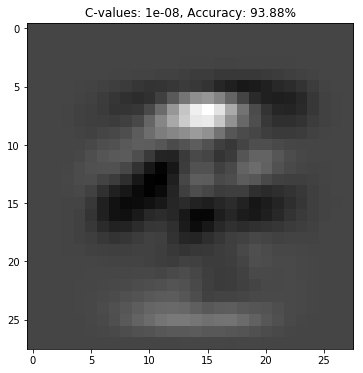

/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


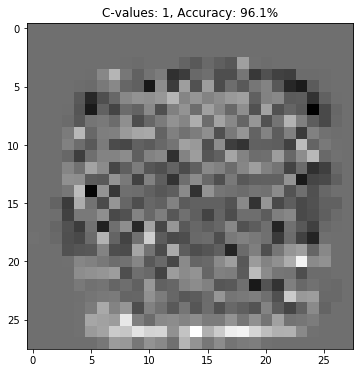

In [150]:
c_values = [1e-10,1e-9,1e-8,1]

for i in c_values:     
    # Fitting the logistic model
    logit_small = LogisticRegression(C = i, solver = 'lbfgs', random_state=123)
    logit_small.fit(x_train, y_train.ravel())
    
    # Calculating accuracy
    score = logit_small.score(x_val, y_val)*100
    y_pred = logit_small.predict(x_val)

    # Let's plot the coefficients of the ten classes
    f = plt.figure(1, figsize=(6,6))
    plt.imshow(logit_small.coef_.reshape(28,28), cmap = 'gray')
    plt.title(f'C-values: {i}, Accuracy: {round(score,2)}%')
    plt.show()

As before, increasing accuracy results in a blurred image of the coefficient weight. Now, to investigate this better, let's look at the difference in the mean of 4.0 and 9.0 

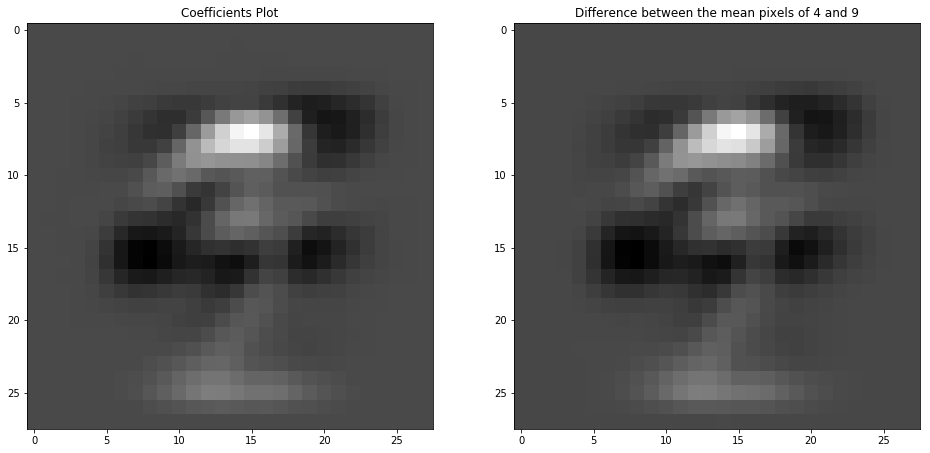

In [161]:
# Fitting the logistic model
logit_small = LogisticRegression(C = 1e-10, solver = 'lbfgs')
logit_small.fit(x_train, y_train.ravel())
    
f = plt.figure(1, figsize=(16,8))

ax = f.add_subplot(121)
ax.imshow(logit_small.coef_.reshape(28,28),  cmap = 'gray')
ax.set_title("Coefficients Plot")

ax2 = f.add_subplot(122)
b = df[df['label']==9.0].iloc[:,:-1].mean()-df[df['label']==4.0].iloc[:,:-1].mean()
ax2.imshow(b.values.reshape(28,28), cmap='gray')
ax2.set_title("Difference between the mean pixels of 4 and 9")
plt.show()

They both look exactly the same! This means that when the model is doing an OK job in differentiating between 4 and 9 (82%), the image of coefficient weights cannot distinguish the 'troublemaker' 4 and 9 because they are equally likely to be either 4 or 9 (as shown by the image of the difference in 4 and 9).

The difference in the mean of 4 and 9 is part of the formula in calculating variance. Now, if you square this difference (which is also a part in calculating variance):

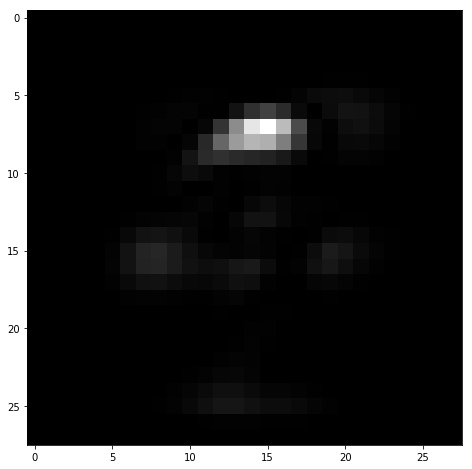

In [170]:
f = plt.figure(1, figsize=(16,8))
c = (df[df['label']==9.0].iloc[:,:-1].mean()-df[df['label']==4.0].iloc[:,:-1].mean())**2
plt.imshow(c.values.reshape(28,28), cmap='gray')
plt.show()

Those pixels are the 'trouble-maker' area in differentiating between 4 and 9. If we think intuitively, the difference between 4 and 9 is pretty much the area in the region. 

### Question 5

Your goal is to train a model that maximises the predictive performance (accuracy in this case) on this task.

Optimise your model's hyperparameters if it has any. Give evidence why you believe the hyperparameters that you found are the best ones.

Provide visualizations that demonstrate the model's performance.

For this question, I will use only 20% of my data for training and validating the model so that I can cut down the computational time in narrowing down my search for the hyperparameters. I will use 50 number of components for PCA to also cut down the computational time. 

In [177]:
# Training and Validation Model

# Defining the data points used
x, y = data['data'].T, data['label'].T

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.1, 
                                                    stratify = y, shuffle = True, random_state = 123)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = 0.5, 
                                                    stratify = y_train, shuffle = True, random_state = 123)

# Scaling the data 
scalar = preprocessing.StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_val = scalar.transform(x_val)
x_test = scalar.transform(x_test)

# Defining the number of components to be 50
my_pca = PCA(n_components = 50)
my_pca.fit(x_train)
    
# Transform the data
x_train = my_pca.transform(x_train)
x_val = my_pca.transform(x_val)

/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


To optimize the hyperparameter, I will use a grid search first so that I can narrow down the hyperparameter further and further. 

In [180]:
# First grid search
Cs = [1, 10, 50, 100, 1000]
gammas = [1e-5, 0.0001, 0.001, 0.01]
param_grid = {'C': Cs, 'gamma': gammas}
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2, n_jobs = -1)
grid_table = grid.fit(x_train,y_train.ravel())
SVC_best_params = grid.best_params_
SVC_best_params

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.1min finished


{'C': 10, 'gamma': 0.001}

From the first grid search, we can see that the best result is when C = 10 and gamma = 0.001. Let's narrow down the search C-values around 10 and gamma-values around 0.0001. Furthermore, let's run the model and see what kind of accuracy we're getting. 

In [188]:
# SVM Model

# Defining the data points used
x, y = data['data'].T, data['label'].T

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, 
                                                    stratify = y, shuffle = True, random_state = 123)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = 0.8, 
                                                    stratify = y_train, shuffle = True, random_state = 123)

# Scaling the data 
scalar = preprocessing.StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_val = scalar.transform(x_val)
x_test = scalar.transform(x_test)

# Defining the number of components to be 100
my_pca = PCA(n_components = 100)
my_pca.fit(x_train)
    
# Transform the data
x_train = my_pca.transform(x_train)
x_val = my_pca.transform(x_val)
x_test = my_pca.transform(x_test)

SVM_rbf_time = []
SVM_rbf_val_score = []
SVM_rbf_test_score = []

c_values = range(5, 11, 1)
gamma_values = [5e-4, 1e-3, 5e-3]

from itertools import *

for i,j in product(c_values, gamma_values): 
    start = timeit.default_timer()
    
    # Fitting the SVM model
    SVM_model = SVC(C = i, kernel = 'rbf', gamma = j, random_state = 123)
    SVM_model.fit(x_train, y_train.ravel())

    # Calculating accuracy
    score = SVM_model.score(x_val, y_val.ravel())*100
    test_score = SVM_model.score(x_test, y_test.ravel())*100
    SVM_rbf_val_score.append([i,j, score])
    SVM_rbf_test_score.append([i,j,test_score])

    end = timeit.default_timer()
    SVM_rbf_time.append(end-start)
    print(f'C: {i}, gamma: {j}, Val Accuracy: {round(score,2)}%, Test Accuracy: {round(test_score,2)}%, Run time: {round(end-start,2)}s')

/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda3/envs/mynewenv/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


C: 5, gamma: 0.0005, Val Accuracy: 96.2%, Test Accuracy: 96.36%, Run time: 90.84s
C: 5, gamma: 0.001, Val Accuracy: 97.21%, Test Accuracy: 97.24%, Run time: 88.35s
C: 5, gamma: 0.005, Val Accuracy: 96.98%, Test Accuracy: 96.78%, Run time: 211.03s
C: 6, gamma: 0.0005, Val Accuracy: 96.36%, Test Accuracy: 96.56%, Run time: 84.7s
C: 6, gamma: 0.001, Val Accuracy: 97.36%, Test Accuracy: 97.33%, Run time: 84.22s
C: 6, gamma: 0.005, Val Accuracy: 97.01%, Test Accuracy: 96.79%, Run time: 193.3s
C: 7, gamma: 0.0005, Val Accuracy: 96.44%, Test Accuracy: 96.68%, Run time: 82.01s
C: 7, gamma: 0.001, Val Accuracy: 97.44%, Test Accuracy: 97.39%, Run time: 82.35s
C: 7, gamma: 0.005, Val Accuracy: 97.02%, Test Accuracy: 96.8%, Run time: 193.42s
C: 8, gamma: 0.0005, Val Accuracy: 96.47%, Test Accuracy: 96.76%, Run time: 80.39s
C: 8, gamma: 0.001, Val Accuracy: 97.55%, Test Accuracy: 97.39%, Run time: 81.06s
C: 8, gamma: 0.005, Val Accuracy: 97.01%, Test Accuracy: 96.76%, Run time: 193.36s
C: 9, gamma:

In [223]:
# Putting it all together in a dataframe
test = pd.DataFrame(SVM_rbf_test_score)
val = pd.DataFrame(SVM_rbf_val_score)
SVM_df = pd.merge(test,val, on = [0,1]).reset_index(drop = True)
SVM_df = SVM_df.rename(columns = {0:'C',1:'Gamma','2_x': "Validation Score", "2_y":"Test Score"})
grouped_SVM = SVM_df.groupby(['C', 'Gamma'])['Test Score'].aggregate('mean').unstack()

The maximum accuracy I can get is 97.55%


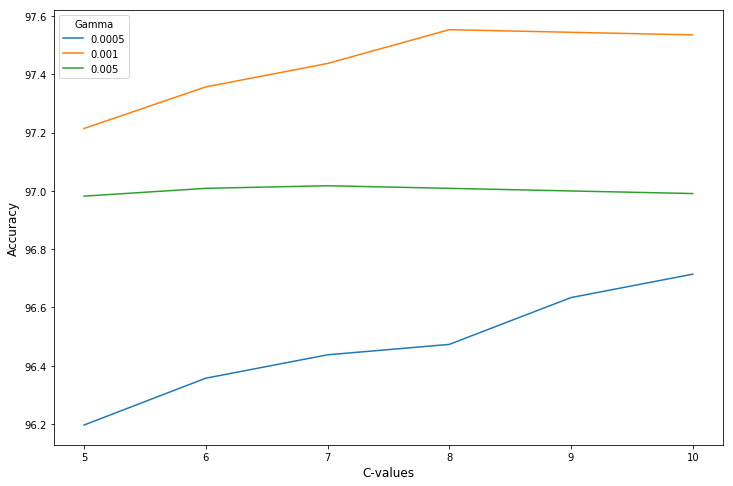

In [246]:
# Plotting the result
print(f'The maximum accuracy I can get is {round(max(SVM_df["Test Score"]),2)}%')
grouped_SVM.plot(figsize=(12,8), kind = 'line')
plt.xlabel("C-values", size = 12)
plt.ylabel("Accuracy", size = 12)
plt.show()

Now, let's save this model into a pickle file and then load them back to see whether the model runs. 

In [243]:
import pickle

SVM_model = SVC(C = 8, kernel = 'rbf', gamma = 0.001, random_state = 123)
SVM_model.fit(x_train, y_train.ravel())
    
# save the model to disk
filename = 'SVM_model.pkl'
pickle.dump(SVM_model, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.974
